In [323]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
damping = 0.8
import matplotlib.pyplot as plt

In [224]:
def solve_res(a, s, j):
    sij = s[j]
    s_needed = np.array(s[:j]+s[j+1:])
    a_needed = np.array(a[:j]+a[j+1:])
    return sij - max(s_needed + a_needed)

def respon(av_l,sim_l):
    l = []
    for i in range(300):
        row=[]
        for j in range(300):  
            responsibility= solve_res(av_l[i],sim_l[i], j)
            row.append(responsibility)
        l.append(row)
    return l

In [225]:
def solve_self_av(resp_col, i):
    out = 0
    for x in range(300):
        if(x==i):
            continue
        out= out+ max(0, resp_col[x])
    return out
def available(res_matrix, res_list):
    l = []
    for i in range(300):
        row=[]
        for j in range(300):
            if (i==j):
                self_avail= solve_self_av(resp_matrix['P'+str(j+1)].tolist(), i)
                row.append(self_avail)
            else:
                s_avail= solve_self_av(resp_matrix['P'+str(j+1)].tolist(), i)
                avail= min(0, resp_list[j][j]+s_avail)
                row.append(avail)
        l.append(row)
    return l

In [226]:
def update_AR(R,A,R_old,A_old):
    for i in range(300):
        R_old[i] = [x * damping for x in R_old[i]]
        R[i]=[x * (1-damping) for x in R[i]]
        R[i] = [a + b for a, b in zip(R[i], R_old[i])]
        A_old[i] = [x * damping for x in A_old[i]]
        A[i]=[x * (1-damping) for x in A[i]]
        A[i] = [a + b for a, b in zip(A[i], A_old[i])]
    return R, A

# Using A  subset of Data

In [349]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X= train_X.reshape(60000, 784)
test_X=test_X.reshape(10000, 784)
train_y=train_y.reshape(60000,1)
test_y=test_y.reshape(10000,1)
train_X=train_X[:300,:]
z= StandardScaler()
train_X= z.fit_transform(train_X)

In [350]:
def sim_m (x, y):
    s=0
    for i in range(784):
        s+=((x[i]-y[i])**2)
    return -1*s

l = []
train_X=np.array(train_X)
for p in train_X:
    row=[]
    for o in train_X:
        row.append(sim_m(p, o))
    l.append(row)

In [360]:
sim_matrix= pd.DataFrame(data=l)
minimum = min(sim_matrix.min())
sim_matrix.replace(0,minimum//2,inplace=True)
sim_list = sim_matrix.values.tolist()
sim_matrix

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-2940.000000,-1376.043266,-2929.702234,-1331.649735,-1636.886089,-1503.118505,-1316.422007,-1138.625565,-1275.651044,-1487.184756,...,-1292.463698,-1256.635871,-1347.417227,-1704.287023,-3716.103561,-1262.500877,-1631.606419,-1482.513452,-1429.088234,-1733.840301
1,-1376.043266,-2940.000000,-2344.169464,-778.251865,-916.464328,-830.625085,-833.760384,-750.292147,-749.315862,-1059.707267,...,-711.176454,-726.066824,-787.679100,-468.914177,-2706.509999,-664.086883,-544.533818,-896.945799,-1044.215259,-862.713860
2,-2929.702234,-2344.169464,-2940.000000,-2119.502060,-2332.390240,-2286.830044,-2129.067773,-2222.738027,-2042.198443,-2210.961961,...,-2096.090684,-2347.006008,-2137.692443,-2660.889390,-2819.075451,-2126.624309,-2405.081271,-2044.263679,-2375.035604,-2449.270336
3,-1331.649735,-778.251865,-2119.502060,-2940.000000,-748.137743,-717.139293,-523.463038,-671.874832,-425.650975,-824.436532,...,-261.561077,-522.901537,-549.907631,-1193.913623,-2691.304038,-438.391849,-965.915211,-764.940791,-913.248602,-912.482345
4,-1636.886089,-916.464328,-2332.390240,-748.137743,-2940.000000,-843.406644,-678.337809,-942.089238,-559.076483,-1011.614157,...,-734.625222,-937.734414,-635.433495,-1346.004520,-2823.657558,-762.686621,-1098.785669,-840.511897,-1108.095427,-1035.597181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-1262.500877,-664.086883,-2126.624309,-438.391849,-762.686621,-725.713956,-505.473347,-562.571732,-421.492229,-761.815878,...,-459.069980,-523.941215,-508.438141,-971.059278,-2729.900974,-2940.000000,-966.869317,-609.352628,-906.160458,-912.639724
296,-1631.606419,-544.533818,-2405.081271,-965.915211,-1098.785669,-1068.575212,-923.832661,-999.108375,-920.359697,-1269.852356,...,-924.431696,-1026.173150,-948.903015,-588.771855,-2689.555203,-966.869317,-2940.000000,-1087.905526,-1165.136307,-844.482411
297,-1482.513452,-896.945799,-2044.263679,-764.940791,-840.511897,-902.544420,-777.380887,-863.839804,-663.651382,-484.104472,...,-726.642109,-915.972592,-627.623998,-1161.058521,-2643.009826,-609.352628,-1087.905526,-2940.000000,-1194.172197,-970.187022
298,-1429.088234,-1044.215259,-2375.035604,-913.248602,-1108.095427,-1052.512714,-707.080580,-846.945772,-702.730346,-1229.193687,...,-762.966234,-857.328962,-771.130589,-1225.943309,-2930.142904,-906.160458,-1165.136307,-1194.172197,-2940.000000,-1281.820237


In [361]:
Init_l= [0]*300
points=[]
for i in range(300):
    points.append('P'+str(i+1))
resp_list=[Init_l] * 300
avail_list=[Init_l] * 300
for i in range(50):
    old_R = resp_list
    old_A = avail_list
    resp_list=respon(avail_list,sim_list)
    resp_matrix=pd.DataFrame(data=resp_list, index=points, columns=points)
    avail_list = available(resp_matrix, resp_list)
    if i!=0:
        resp_list, avail_list = update_AR(resp_list,avail_list,old_R,old_A)

In [362]:
resp_matrix=pd.DataFrame(data=resp_list, index=points, columns=points)
resp_matrix

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P291,P292,P293,P294,P295,P296,P297,P298,P299,P300
P1,-1792.177339,-234.828652,-1788.487620,-190.435121,-495.671475,-361.903890,-175.207393,62.489865,-134.436430,-345.970142,...,-151.249084,-115.421257,-206.202613,-563.072409,-2574.888947,-121.286262,-490.391804,-341.298837,-287.873620,-592.625687
P2,-1699.147388,-2261.775759,-2667.273586,-1101.355987,-1239.568450,-1153.729207,-1156.864506,-1073.396270,-1072.419985,-1382.811390,...,-1034.280576,-1049.170946,-1110.783222,-792.018299,-3029.614122,-987.191005,-867.637941,-1220.049921,-1367.319382,-1185.817983
P3,-931.899075,-346.366305,-940.026320,-121.698902,-334.587081,-289.026885,-131.264614,-224.934868,-44.395285,-213.158803,...,-98.287526,-349.202849,-139.889284,-663.086232,-821.272292,-128.821150,-407.278112,-46.460520,-377.232445,-451.467177
P4,-1062.446363,-509.048493,-1850.298689,-2630.626208,-478.934371,-447.935921,-254.259666,-402.671460,-156.447603,-555.233160,...,7.642295,-253.698165,-280.704259,-924.710251,-2422.100667,-169.188477,-696.711839,-495.737419,-644.045230,-643.278973
P5,-1098.833993,-378.412232,-1794.338143,-210.085647,-2390.565857,-305.354548,-140.285713,-404.037141,-21.024387,-473.562061,...,-196.573126,-399.682318,-97.381398,-807.952424,-2285.605462,-224.634525,-560.733573,-302.459801,-570.043330,-497.545084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P296,-868.772856,-270.358862,-1732.896288,-44.663828,-368.958600,-331.985935,-111.745326,-168.843711,-27.764208,-368.087857,...,-65.341959,-130.213194,-114.710120,-577.331257,-2336.172953,-2504.641885,-573.141296,-215.624607,-512.432438,-518.911703
P297,-1083.653539,275.248664,-1857.128391,-417.962331,-550.832789,-520.622332,-375.879781,-451.155495,-372.406817,-721.899476,...,-376.478816,-478.220271,-400.950136,-40.818975,-2141.602323,-418.916437,-2381.773504,-539.952646,-617.183427,-296.529531
P298,-1100.490534,-514.922882,-1662.240762,-382.917873,-458.488980,-520.521503,-395.357970,-481.816887,-281.628465,-102.081555,...,-344.619192,-533.949675,-245.601081,-779.035604,-2260.986908,-227.329711,-705.882609,-2544.011796,-812.149280,-588.164105
P299,-1347.475972,-962.602998,-2293.423343,-831.636341,-1026.483165,-970.900452,-625.468318,-765.333511,-621.118085,-1147.581425,...,-681.353972,-775.716701,-689.518327,-1144.331047,-2848.530642,-824.548197,-1083.524045,-1112.559935,-2158.390356,-1200.207976


In [363]:
avail_matrix=pd.DataFrame(data=avail_list, index=points, columns=points)
avail_matrix

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P291,P292,P293,P294,P295,P296,P297,P298,P299,P300
P1,2.342155,-1.304826,-940.032057,-729.173619,-1720.097769,-1134.491996,-1390.744200,-1.088248,-1106.696215,-2186.835297,...,-1581.694208,-864.523824,-2173.869160,-2330.015596,-385.97514,-966.952976,-1963.458960,-2015.497817,-0.959055,-1629.233988
P2,-1791.475012,3142.511360,-940.032057,-729.173619,-1720.097769,-1134.491996,-1390.722099,-1.088248,-1106.696215,-2186.790282,...,-1581.694208,-864.261902,-2173.869160,-2330.015596,-385.97514,-966.625082,-1963.458960,-2015.497817,-0.959055,-1629.233988
P3,-1791.475012,-1.304826,0.640467,-729.176018,-1720.097769,-1134.491996,-1390.722604,-1.088248,-1106.713926,-2186.790282,...,-1581.701245,-864.261902,-2173.869160,-2330.015596,-385.97514,-966.648163,-1963.458960,-2015.732100,-0.959055,-1629.233988
P4,-1791.475012,-1.304826,-940.032057,1919.410483,-1720.097769,-1134.491996,-1390.722099,-1.088248,-1106.696215,-2186.790282,...,-1626.321630,-864.261902,-2173.869160,-2330.015596,-385.97514,-966.625082,-1963.458960,-2015.497817,-0.959055,-1629.233988
P5,-1791.475012,-1.304826,-940.032057,-729.173619,675.322465,-1134.491996,-1390.737421,-1.088248,-1108.367061,-2186.790282,...,-1581.694208,-864.261902,-2174.130339,-2330.015596,-385.97514,-966.625082,-1963.458960,-2015.497817,-0.959055,-1629.233988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P296,-1791.475012,-1.304826,-940.032057,-729.716481,-1720.097769,-1134.491996,-1390.722099,-1.088248,-1115.203083,-2186.790282,...,-1581.694208,-864.261902,-2173.869160,-2330.015596,-385.97514,1553.252741,-1963.458960,-2015.497817,-0.959055,-1629.233988
P297,-1791.475012,-1.803054,-940.032057,-729.173619,-1720.097769,-1134.491996,-1390.722099,-1.088248,-1106.696215,-2186.790282,...,-1581.694208,-864.261902,-2173.869160,-2332.768073,-385.97514,-966.625082,422.230602,-2015.497817,-0.959055,-1629.233988
P298,-1791.475012,-1.304826,-940.032057,-729.173619,-1720.097769,-1134.491996,-1390.722099,-1.088248,-1106.696215,-2192.443367,...,-1581.694208,-864.261902,-2173.869160,-2330.015596,-385.97514,-966.716866,-1963.458960,535.623070,-0.959055,-1629.233988
P299,-1791.475012,-1.304826,-940.032057,-729.173619,-1720.097769,-1134.491996,-1390.722099,-1.088248,-1106.696215,-2186.790282,...,-1581.694208,-864.261902,-2173.869160,-2330.015596,-385.97514,-966.625082,-1963.458960,-2015.497817,2697.114035,-1629.233988


In [364]:
C=resp_matrix+avail_matrix
C

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P291,P292,P293,P294,P295,P296,P297,P298,P299,P300
P1,-1789.835184,-236.133477,-2728.519676,-919.608740,-2215.769244,-1496.395886,-1565.951593,61.401617,-1241.132645,-2532.805439,...,-1732.943292,-979.945081,-2380.071773,-2893.088005,-2960.864087,-1088.239239,-2453.850765,-2356.796654,-288.832675,-2221.859675
P2,-3490.622400,880.735601,-3607.305643,-1830.529606,-2959.666219,-2288.221203,-2547.586606,-1074.484518,-2179.116200,-3569.601672,...,-2615.974785,-1913.432848,-3284.652382,-3122.033895,-3415.589261,-1953.816088,-2831.096901,-3235.547738,-1368.278437,-2815.051971
P3,-2723.374086,-347.671130,-939.385853,-850.874920,-2054.684850,-1423.518881,-1521.987218,-226.023116,-1151.109211,-2399.949084,...,-1679.988771,-1213.464751,-2313.758444,-2993.101828,-1207.247431,-1095.469313,-2370.737072,-2062.192620,-378.191501,-2080.701165
P4,-2853.921375,-510.353319,-2790.330745,-711.215725,-2199.032140,-1582.427917,-1644.981765,-403.759708,-1263.143818,-2742.023442,...,-1618.679335,-1117.960067,-2454.573419,-3254.725847,-2808.075806,-1135.813559,-2660.170800,-2511.235236,-645.004286,-2272.512961
P5,-2890.309004,-379.717057,-2734.370200,-939.259265,-1715.243392,-1439.846543,-1531.023134,-405.125389,-1129.391448,-2660.352343,...,-1778.267334,-1263.944220,-2271.511737,-3137.968020,-2671.580602,-1191.259607,-2524.192533,-2317.957618,-571.002386,-2126.779072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P296,-2660.247867,-271.663688,-2672.928345,-774.380309,-2089.056369,-1466.477931,-1502.467425,-169.931959,-1142.967291,-2554.878139,...,-1647.036167,-994.475096,-2288.579280,-2907.346854,-2722.148093,-951.389144,-2536.600256,-2231.122424,-513.391493,-2148.145691
P297,-2875.128550,273.445609,-2797.160448,-1147.135950,-2270.930559,-1655.114328,-1766.601881,-452.243743,-1479.103032,-2908.689758,...,-1958.173024,-1342.482172,-2574.819296,-2373.587049,-2527.577462,-1385.541519,-1959.542902,-2555.450463,-618.142482,-1925.763519
P298,-2891.965546,-516.227707,-2602.272818,-1112.091492,-2178.586749,-1655.013498,-1786.080069,-482.905135,-1388.324680,-2294.524922,...,-1926.313400,-1398.211576,-2419.470241,-3109.051200,-2646.962048,-1194.046576,-2669.341569,-2008.388726,-813.108335,-2217.398093
P299,-3138.950984,-963.907823,-3233.455399,-1560.809959,-2746.580934,-2105.392448,-2016.190418,-766.421759,-1727.814300,-3334.371707,...,-2263.048180,-1639.978603,-2863.387487,-3474.346643,-3234.505782,-1791.173279,-3046.983006,-3128.057752,538.723679,-2829.441963


In [365]:
labels_our = [np.argmax(C.iloc[i]) for i in range(300)]
for i in range (300):
    print("P"+str(i+1),labels_our[i])

P1 7
P2 1
P3 276
P4 276
P5 26
P6 195
P7 276
P8 7
P9 276
P10 289
P11 276
P12 276
P13 298
P14 39
P15 276
P16 195
P17 289
P18 195
P19 276
P20 195
P21 289
P22 1
P23 195
P24 276
P25 276
P26 7
P27 26
P28 7
P29 298
P30 276
P31 276
P32 7
P33 39
P34 195
P35 39
P36 276
P37 39
P38 1
P39 26
P40 39
P41 276
P42 195
P43 26
P44 195
P45 276
P46 26
P47 26
P48 289
P49 276
P50 7
P51 276
P52 1
P53 26
P54 276
P55 26
P56 195
P57 283
P58 195
P59 26
P60 276
P61 289
P62 289
P63 39
P64 1
P65 39
P66 276
P67 39
P68 276
P69 283
P70 39
P71 276
P72 195
P73 276
P74 39
P75 298
P76 1
P77 276
P78 276
P79 276
P80 195
P81 39
P82 1
P83 39
P84 39
P85 26
P86 7
P87 298
P88 195
P89 283
P90 195
P91 39
P92 195
P93 26
P94 39
P95 195
P96 1
P97 26
P98 195
P99 298
P100 276
P101 276
P102 26
P103 276
P104 195
P105 276
P106 276
P107 39
P108 7
P109 283
P110 276
P111 26
P112 7
P113 276
P114 276
P115 283
P116 289
P117 26
P118 7
P119 1
P120 1
P121 298
P122 283
P123 276
P124 195
P125 276
P126 276
P127 39
P128 289
P129 276
P130 39
P131 276
P1

In [366]:
index= np.unique(labels_our)
index

array([  1,   7,  26,  39, 195, 220, 276, 283, 289, 298], dtype=int64)

In [367]:
centers=[]
dict={}
for idx in index:
    dict[idx]= train_y[idx]

In [368]:
predicted=[]
for i in labels_our:
    predicted.append(dict[i])
print(classification_report(train_y[:300],predicted))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87        34
           1       0.42      0.95      0.58        39
           2       1.00      0.04      0.07        28
           3       0.57      0.74      0.64        34
           4       0.39      0.78      0.52        32
           5       0.00      0.00      0.00        23
           6       0.64      0.86      0.74        29
           7       0.00      0.00      0.00        29
           8       0.00      0.00      0.00        21
           9       0.25      0.29      0.27        31

    accuracy                           0.50       300
   macro avg       0.42      0.44      0.37       300
weighted avg       0.45      0.50      0.41       300



C:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


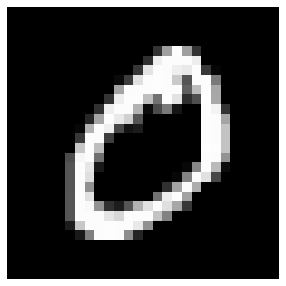

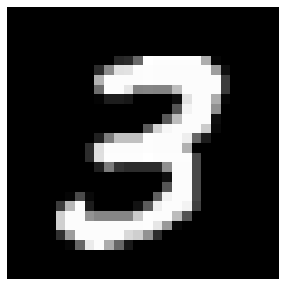

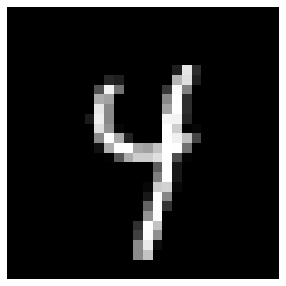

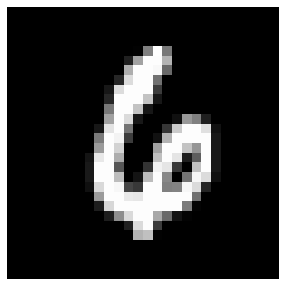

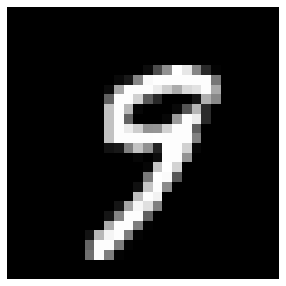

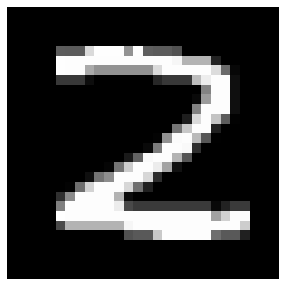

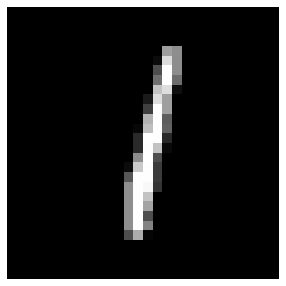

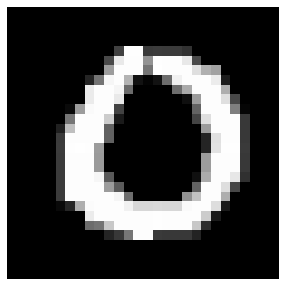

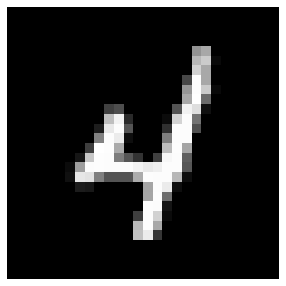

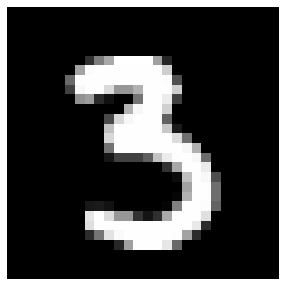

In [369]:
(tr_X, tr_y), (tst_X, tst_y) = mnist.load_data()
for idx in index:
    plt.figure(figsize=(5,5))
    image = tr_X[idx]# plot the sample
    fig = plt.figure
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()